In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%aimport sog1_helpers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

#plt.rcParams['text.usetex'] = True

plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [3]:
activity_col = "Activity_S3_1"

Shuffle position info

In [4]:
shuffle_vars = sog1_helpers.return_activities("_shuffle_size")
shuffle_vars#["Other"].value_counts()

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,33_shuffle_size2_ss2_pos0_1,shuffle_size2_ss2_pos0_1,321,341,361,MELDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,551.074606,746.700944,648.887775
1,33_shuffle_size2_ss2_pos1_1,shuffle_size2_ss2_pos1_1,321,341,361,EMDLDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,853.514237,777.756933,815.635585
2,33_shuffle_size2_ss2_pos2_1,shuffle_size2_ss2_pos2_1,321,341,361,EMLDKDEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,1940.821638,NaN,1940.821638
3,33_shuffle_size2_ss2_pos4_1,shuffle_size2_ss2_pos4_1,321,341,361,EMLDDKEEEQKDRDNENQGEEDPTWFDSGSQFILNSQQLV,NaN,NaN,NaN
4,33_shuffle_size2_ss2_pos5_1,shuffle_size2_ss2_pos5_1,321,341,361,EMLDDKEEQEDKRDNENQGEEDPTWFDSGSQFILNSQQLV,656.065410,619.839891,637.952651
...,...,...,...,...,...,...,...,...,...
3568,42_shuffle_size10_ss2_pos15_6,shuffle_size10_ss2_pos15_6,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSLWTGADFGTK,966.536960,805.704010,886.120485
3569,42_shuffle_size10_ss2_pos15_7,shuffle_size10_ss2_pos15_7,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSTTKGDALWFG,3552.934400,3813.512564,3683.223482
3570,42_shuffle_size10_ss2_pos15_8,shuffle_size10_ss2_pos15_8,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSTLDFGKGATW,NaN,NaN,NaN
3571,42_shuffle_size10_ss2_pos15_9,shuffle_size10_ss2_pos15_9,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSTWFTGGADLK,1073.443438,NaN,1073.443438


In [5]:
# There are 5 tiles
# 33-35 and 41, 42
shuffle_vars["Description"].str.split("_").str[0].value_counts()

Description
41    738
34    712
35    712
33    711
42    700
Name: count, dtype: int64

In [6]:
# WT tiles
BasicArTh = sog1_helpers.return_activities("BasicArTh", pos_regex = r'\.(\d+)')
BasicArTh.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,BasicArTh.1,Q6NQK2,1,21,41,MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP,349.798825,573.084946,461.441886
1,BasicArTh.2,Q6NQK2,11,31,51,NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD,470.700956,2417.845241,1444.273098
2,BasicArTh.3,Q6NQK2,21,41,61,SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR,867.654700,1328.781736,1098.218218


In [7]:
shuffle_vars_with_diff = sog1_helpers.add_all_var_positions(shuffle_vars, BasicArTh, activity_col, add_AAs = True)
shuffle_vars_with_diff.head(3)

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars,AAs
0,33_shuffle_size2_ss2_pos0_1,shuffle_size2_ss2_pos0_1,321,341,361,MELDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,551.074606,746.700944,648.887775,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[321, 322]","[E, M]"
1,33_shuffle_size2_ss2_pos1_1,shuffle_size2_ss2_pos1_1,321,341,361,EMDLDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,853.514237,777.756933,815.635585,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[323, 324]","[L, D]"
2,33_shuffle_size2_ss2_pos2_1,shuffle_size2_ss2_pos2_1,321,341,361,EMLDKDEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,1940.821638,NaN,1940.821638,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[325, 326]","[D, K]"


In [8]:
shuffle_vars_with_diff["tile"] = shuffle_vars_with_diff["Description_var"].str.split("_").str[0].astype(int)
shuffle_vars_with_diff["shuffle_size"] = shuffle_vars_with_diff["Other_var"].str.split("shuffle_size").str[1].str.split("_").str[0].astype(int)
shuffle_vars_with_diff

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars,AAs,tile,shuffle_size
0,33_shuffle_size2_ss2_pos0_1,shuffle_size2_ss2_pos0_1,321,341,361,MELDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,551.074606,746.700944,648.887775,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.522900,"[321, 322]","[E, M]",33,2
1,33_shuffle_size2_ss2_pos1_1,shuffle_size2_ss2_pos1_1,321,341,361,EMDLDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,853.514237,777.756933,815.635585,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.522900,"[323, 324]","[L, D]",33,2
2,33_shuffle_size2_ss2_pos2_1,shuffle_size2_ss2_pos2_1,321,341,361,EMLDKDEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,1940.821638,NaN,1940.821638,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.522900,"[325, 326]","[D, K]",33,2
3,33_shuffle_size2_ss2_pos4_1,shuffle_size2_ss2_pos4_1,321,341,361,EMLDDKEEEQKDRDNENQGEEDPTWFDSGSQFILNSQQLV,NaN,NaN,NaN,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.522900,"[329, 330]","[Q, E]",33,2
4,33_shuffle_size2_ss2_pos5_1,shuffle_size2_ss2_pos5_1,321,341,361,EMLDDKEEQEDKRDNENQGEEDPTWFDSGSQFILNSQQLV,656.065410,619.839891,637.952651,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.522900,"[331, 332]","[K, D]",33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,42_shuffle_size10_ss2_pos15_6,shuffle_size10_ss2_pos15_6,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSLWTGADFGTK,966.536960,805.704010,886.120485,BasicArTh.42,Q6NQK2,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,2221.196339,2039.845552,2130.520945,"[440, 441, 442, 443, 444, 445, 446, 447, 449]","[F, L, A, W, G, T, G, K, D]",42,10
3569,42_shuffle_size10_ss2_pos15_7,shuffle_size10_ss2_pos15_7,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSTTKGDALWFG,3552.934400,3813.512564,3683.223482,BasicArTh.42,Q6NQK2,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,2221.196339,2039.845552,2130.520945,"[440, 441, 442, 443, 444, 445, 446, 447, 448, ...","[F, L, A, W, G, T, G, K, T, D]",42,10
3570,42_shuffle_size10_ss2_pos15_8,shuffle_size10_ss2_pos15_8,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSTLDFGKGATW,NaN,NaN,NaN,BasicArTh.42,Q6NQK2,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,2221.196339,2039.845552,2130.520945,"[440, 442, 443, 445, 447, 449]","[F, A, W, T, K, D]",42,10
3571,42_shuffle_size10_ss2_pos15_9,shuffle_size10_ss2_pos15_9,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSTWFTGGADLK,1073.443438,NaN,1073.443438,BasicArTh.42,Q6NQK2,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,2221.196339,2039.845552,2130.520945,"[440, 441, 442, 443, 445, 446, 447, 448, 449]","[F, L, A, W, T, G, K, T, D]",42,10


In [9]:
# Load in shuffles for one tile 
one_tile_shuffles = shuffle_vars_with_diff[shuffle_vars_with_diff["tile"] == 33]
one_tile_shuffles

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars,AAs,tile,shuffle_size
0,33_shuffle_size2_ss2_pos0_1,shuffle_size2_ss2_pos0_1,321,341,361,MELDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,551.074606,746.700944,648.887775,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[321, 322]","[E, M]",33,2
1,33_shuffle_size2_ss2_pos1_1,shuffle_size2_ss2_pos1_1,321,341,361,EMDLDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,853.514237,777.756933,815.635585,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[323, 324]","[L, D]",33,2
2,33_shuffle_size2_ss2_pos2_1,shuffle_size2_ss2_pos2_1,321,341,361,EMLDKDEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,1940.821638,NaN,1940.821638,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[325, 326]","[D, K]",33,2
3,33_shuffle_size2_ss2_pos4_1,shuffle_size2_ss2_pos4_1,321,341,361,EMLDDKEEEQKDRDNENQGEEDPTWFDSGSQFILNSQQLV,NaN,NaN,NaN,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[329, 330]","[Q, E]",33,2
4,33_shuffle_size2_ss2_pos5_1,shuffle_size2_ss2_pos5_1,321,341,361,EMLDDKEEQEDKRDNENQGEEDPTWFDSGSQFILNSQQLV,656.065410,619.839891,637.952651,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[331, 332]","[K, D]",33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,33_shuffle_size10_ss2_pos15_6,shuffle_size10_ss2_pos15_6,321,341,361,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQQILLQFVSN,2013.012849,2113.499147,2063.255998,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[352, 355, 356, 357, 358, 359, 360]","[F, N, S, Q, Q, L, V]",33,10
1811,33_shuffle_size10_ss2_pos15_7,shuffle_size10_ss2_pos15_7,321,341,361,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSVLQSIQQNLF,454.475226,320.151435,387.313331,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[351, 352, 353, 354, 355, 356, 358, 360]","[Q, F, I, L, N, S, Q, V]",33,10
1812,33_shuffle_size10_ss2_pos15_8,shuffle_size10_ss2_pos15_8,321,341,361,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSSLNQVFQLIQ,842.954679,842.344708,842.649693,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[351, 352, 353, 354, 355, 356, 358, 359, 360]","[Q, F, I, L, N, S, Q, L, V]",33,10
1813,33_shuffle_size10_ss2_pos15_9,shuffle_size10_ss2_pos15_9,321,341,361,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSIQQSQLVFNL,414.412325,1988.258331,1201.335328,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[351, 352, 353, 354, 355, 356, 357, 358, 359, ...","[Q, F, I, L, N, S, Q, Q, L, V]",33,10


In [10]:
one_tile_shuffles["shuffle_size"].value_counts()

shuffle_size
4     183
6     180
8     170
10    160
2      18
Name: count, dtype: int64

In [11]:
sog1_aa_features = pd.read_csv("../data/Sog1_AA_features.csv", index_col = 0)
sog1_aa_features

,pos,aa,part,PS_lib1,PS_lib2,charge_lib1,charge_lib2,hydrophob_lib1,hydrophob_lib2
0,1,M,NTD,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A,NTD,NaN,NaN,NaN,NaN,NaN,NaN
2,3,G,NTD,NaN,NaN,NaN,NaN,NaN,NaN
3,4,R,NTD,NaN,NaN,NaN,positive,NaN,NaN
4,5,S,NTD,potential,potential,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
444,445,T,CTD,potential,potential,NaN,NaN,NaN,NaN
445,446,G,CTD,NaN,NaN,NaN,NaN,NaN,NaN
446,447,K,CTD,NaN,NaN,NaN,positive,NaN,NaN
447,448,T,CTD,potential,potential,NaN,NaN,NaN,NaN


In [87]:
def plot_shuffles(one_tile_shuffles):
    fig, axs = plt.subplots(2, 1, sharex = True, figsize = (5,2.5), dpi = 300, gridspec_kw={'height_ratios': [1, 0.06]})

    ax1, ax2 = axs[0], axs[1]
    
    max_y = 0
    for i in range(len(one_tile_shuffles)):
        row_vars = one_tile_shuffles["vars"].iloc[i]
        ax1.hlines(y=one_tile_shuffles[activity_col + "_var"].iloc[i], 
                   xmin=min(row_vars), 
                   xmax=max(row_vars), 
                   color=sns.color_palette('colorblind')[-1], 
                   linestyle='-', alpha = 0.6, lw = 0.2)
        max_y = max(max_y, one_tile_shuffles[activity_col + "_var"].iloc[i])
        

                           
    ax1.axhline(one_tile_shuffles[activity_col + "_wt"].iloc[0], lw = 1, color = 'black', alpha = 0.5)
    ax1.set_xlim(one_tile_shuffles["Start"].iloc[i] - 0.5, one_tile_shuffles["End"].iloc[i])    
    ax1.set_ylim(0, max_y)
    ax1.text(x = one_tile_shuffles["End"].iloc[i], y = one_tile_shuffles[activity_col + "_wt"].iloc[0], ha = 'right', va = 'bottom', s = "WT", color = "black")
    
    color_dict = {"D" : sns.color_palette('colorblind')[2], 
                  "E" :sns.color_palette('colorblind')[2], 
                  "R" : sns.color_palette('colorblind')[3], 
                  "K" : sns.color_palette('colorblind')[3], 
                  "W" : sns.color_palette('colorblind')[0], 
                  "F" :sns.color_palette('colorblind')[0], 
                  "Y" :sns.color_palette('colorblind')[0], 
                  "L" : sns.color_palette('colorblind')[0]}
        
    for pos in np.arange(one_tile_shuffles["Start"].iloc[i],
        one_tile_shuffles["End"].iloc[i] ):
        AA = sog1_aa_features[sog1_aa_features["pos"] == pos]["aa"].iloc[0]

        if AA in color_dict.keys():
            color = color_dict[AA]
        else: 
            color = 'silver'
        ax2.text(x = pos, y = 1, s = AA, font = 'monospace', ha = 'center', color = color, va = 'top')

    ax2.set_ylim(0.8, 1)
                
    ax1.set_title("Tile " + str(one_tile_shuffles["tile"].iloc[i]) + " Shuffle Variants")
    plt.tight_layout(pad=0)

    sns.despine(ax = ax1, left = False)
    sns.despine(ax = ax2, left = True, bottom = True)

    #ax2.set_yticklabels([])
    ax2.set_yticks([])
    ax1.set_ylabel("Activity")
    ax2.set_xlabel("Position")


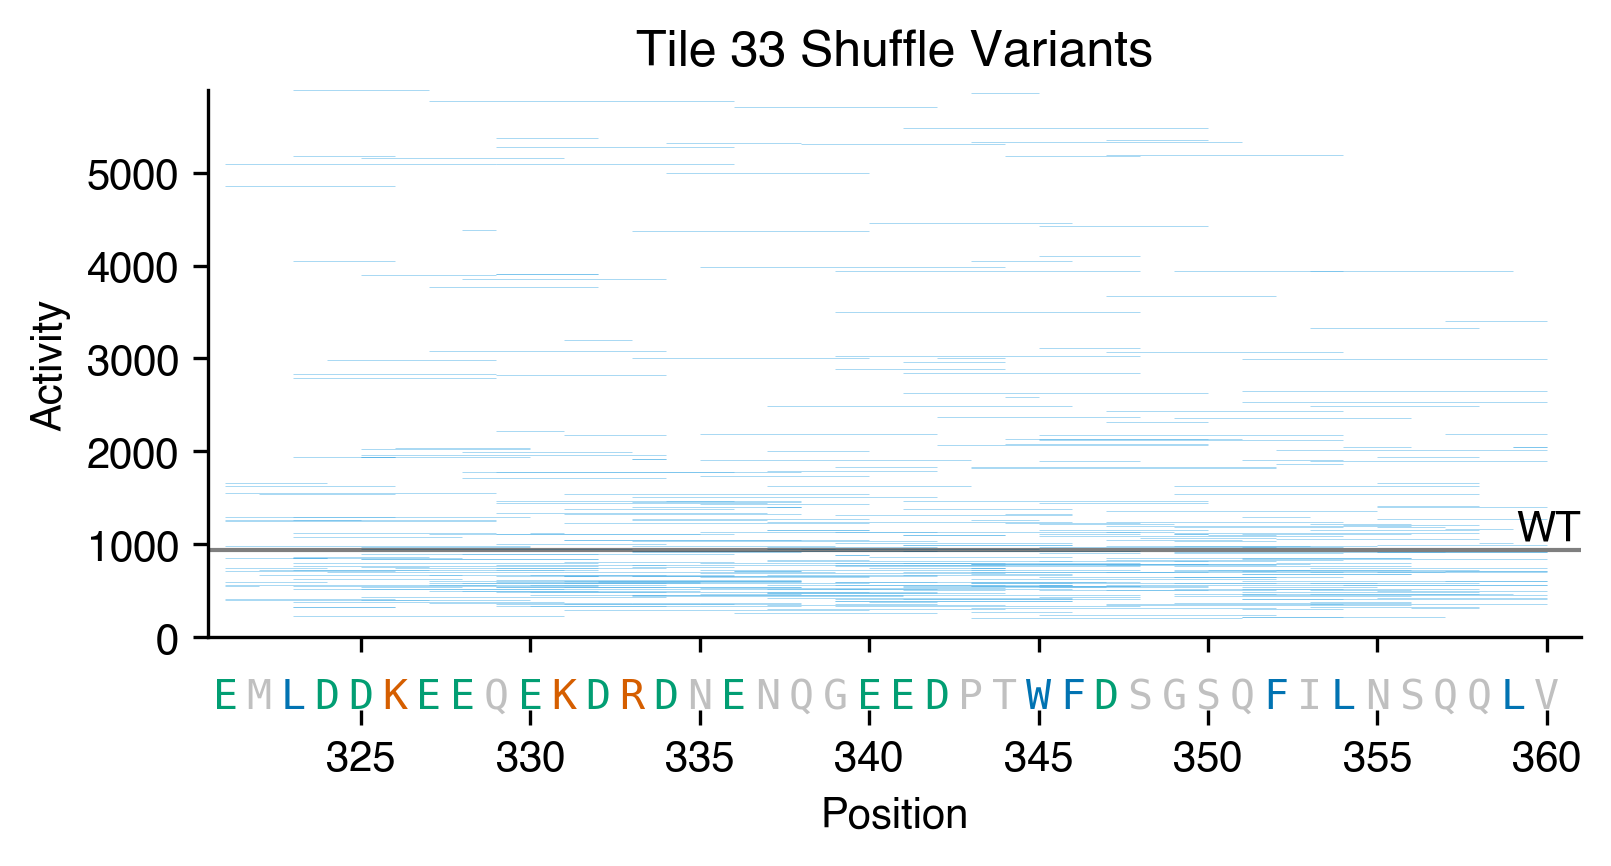

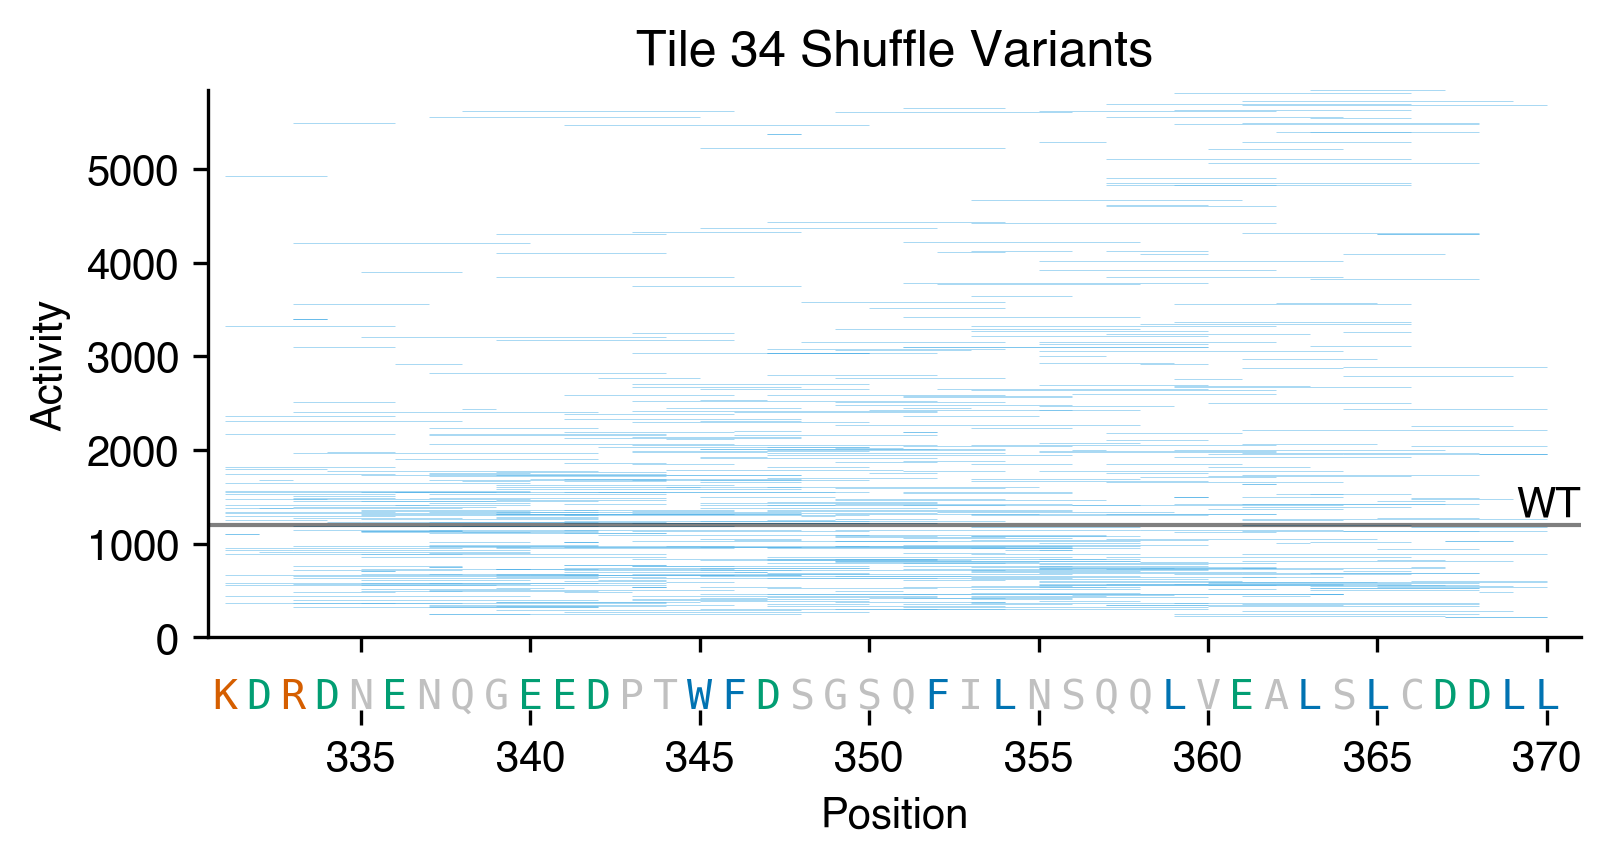

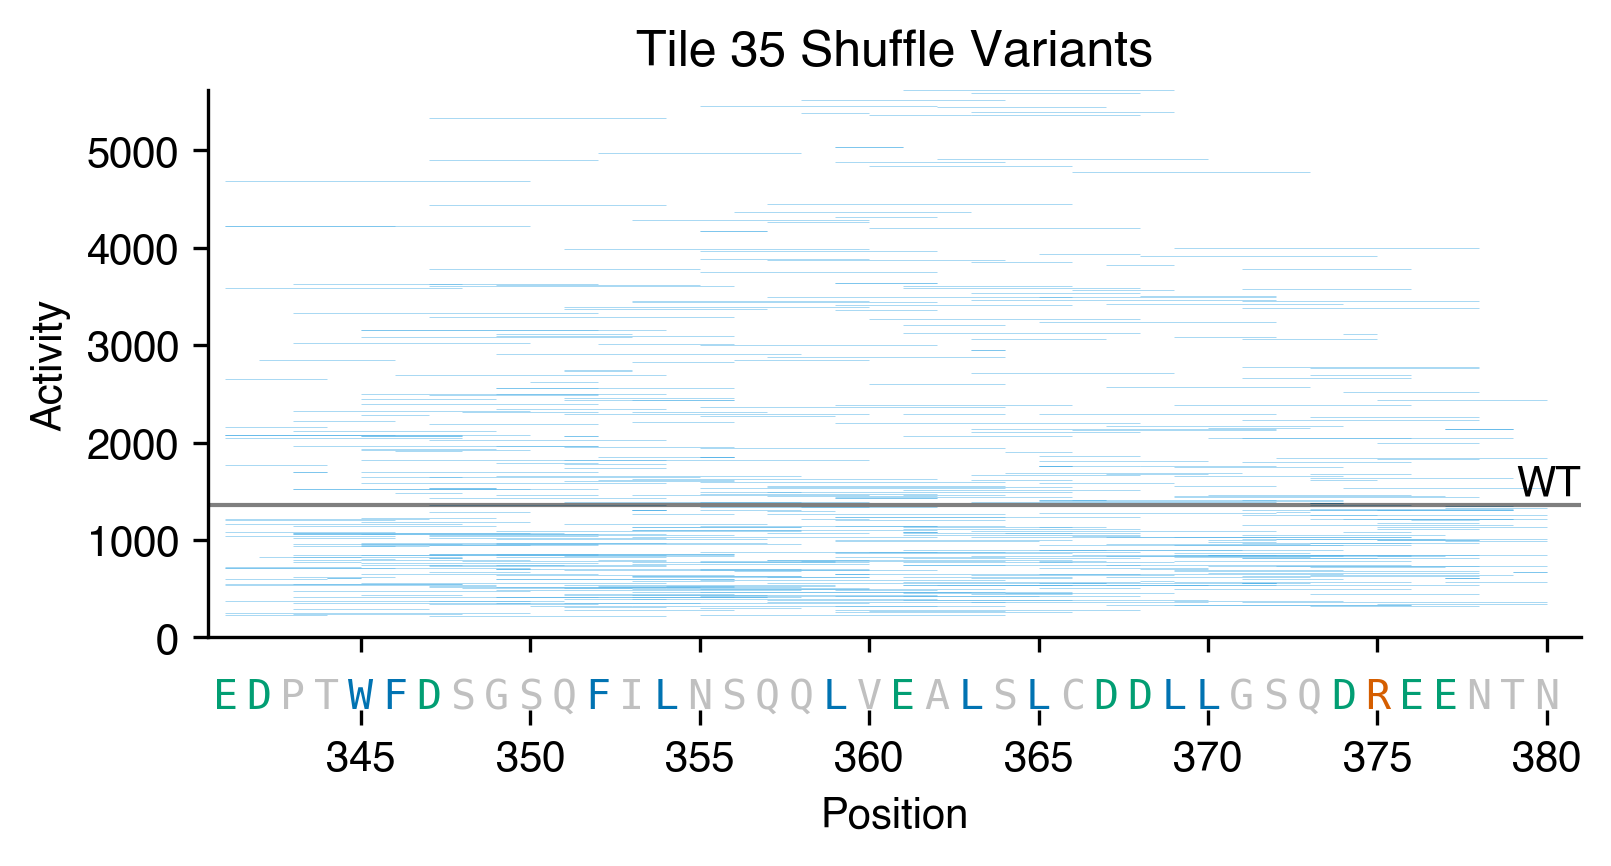

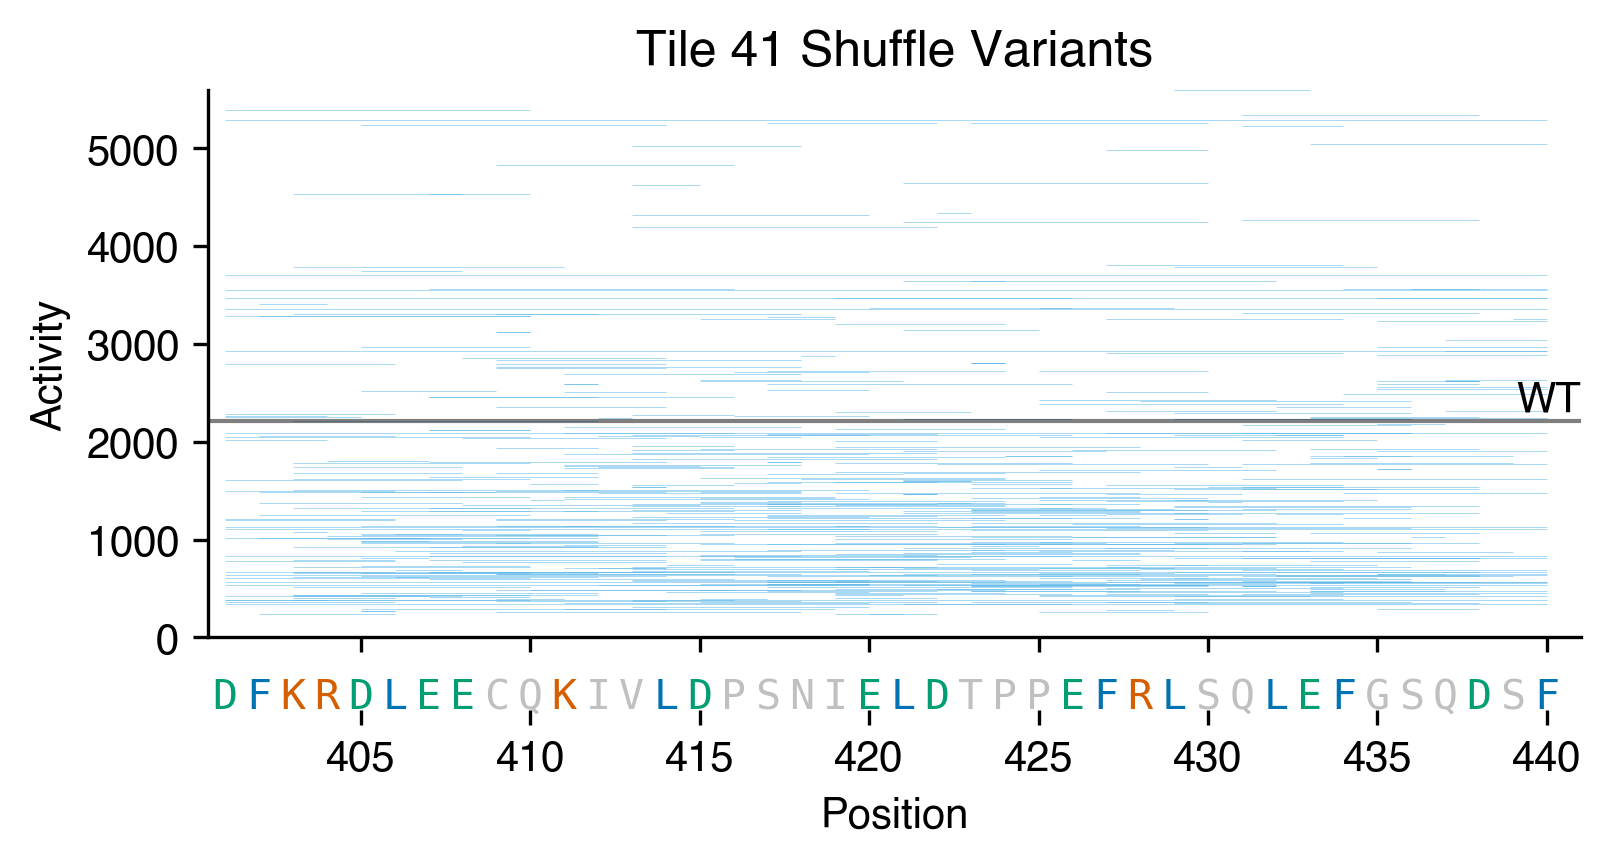

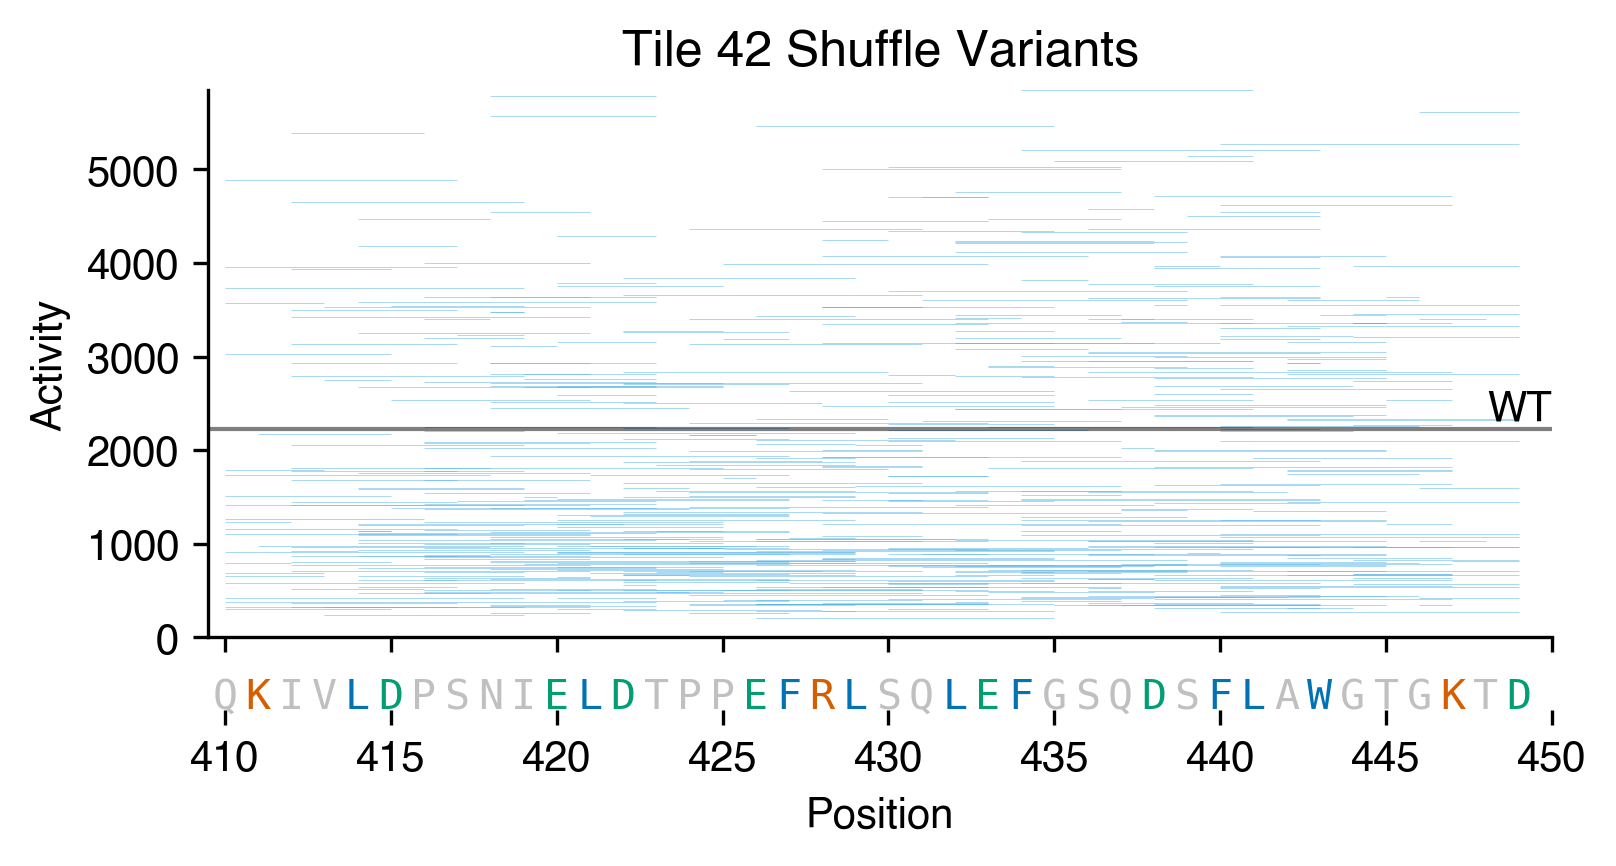

In [88]:
for tile in shuffle_vars_with_diff["tile"].unique():
    df = shuffle_vars_with_diff[shuffle_vars_with_diff["tile"] == tile]
    plot_shuffles(df)
    plt.savefig("../output/figures/shuffles/" + str(tile))

In [13]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [14]:
df = shuffle_vars_with_diff[shuffle_vars_with_diff["tile"] == 33]
df = df[df["shuffle_size"] == 4]
df

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars,AAs,tile,shuffle_size
52,33_shuffle_size4_ss2_pos0_1,shuffle_size4_ss2_pos0_1,321,341,361,DEMLDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,NaN,NaN,NaN,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[321, 322, 323, 324]","[E, M, L, D]",33,4
53,33_shuffle_size4_ss2_pos0_2,shuffle_size4_ss2_pos0_2,321,341,361,MEDLDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,742.720826,518.128923,630.424874,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[321, 322, 323, 324]","[E, M, L, D]",33,4
54,33_shuffle_size4_ss2_pos0_3,shuffle_size4_ss2_pos0_3,321,341,361,LEDMDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,NaN,NaN,NaN,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[321, 322, 323, 324]","[E, M, L, D]",33,4
55,33_shuffle_size4_ss2_pos0_4,shuffle_size4_ss2_pos0_4,321,341,361,MDLEDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,NaN,NaN,NaN,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[321, 322, 324]","[E, M, D]",33,4
56,33_shuffle_size4_ss2_pos0_5,shuffle_size4_ss2_pos0_5,321,341,361,LDMEDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,NaN,NaN,NaN,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[321, 322, 323, 324]","[E, M, L, D]",33,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,33_shuffle_size4_ss2_pos18_6,shuffle_size4_ss2_pos18_6,321,341,361,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSLQVQ,715.917417,723.325126,719.621271,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[357, 359, 360]","[Q, L, V]",33,4
231,33_shuffle_size4_ss2_pos18_7,shuffle_size4_ss2_pos18_7,321,341,361,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQVL,2052.610996,1848.435557,1950.523276,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[359, 360]","[L, V]",33,4
232,33_shuffle_size4_ss2_pos18_8,shuffle_size4_ss2_pos18_8,321,341,361,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSLQQV,1161.396360,1101.916241,1131.656300,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[357, 359]","[Q, L]",33,4
233,33_shuffle_size4_ss2_pos18_9,shuffle_size4_ss2_pos18_9,321,341,361,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQVQL,NaN,NaN,NaN,BasicArTh.33,Q6NQK2,EMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLV,940.578923,884.466877,912.5229,"[358, 359, 360]","[Q, L, V]",33,4


In [83]:
# for shuffle_size in [2, 4, 6, 8, 10]:
#     df = shuffle_vars_with_diff[shuffle_vars_with_diff["tile"] == 34]
#     df = df[df["shuffle_size"] == shuffle_size]
#     plot_shuffles(df)

# Alanines

In [16]:
Ascan = sog1_helpers.return_activities("Ascan")
Ascan_s = Ascan[~Ascan["Description"].str.contains("comb")]#["Other"].value_counts()
Ascan_s

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,3_Ascan_1-4,NaN,21,41,61,AAAADPRQVVWKSNPSRHCPKCQHVIDNSDAVDDWPGLPR,NaN,NaN,NaN
1,3_Ascan_5-8,NaN,21,41,61,SASSAAAAVVWKSNPSRHCPKCQHVIDNSDAVDDWPGLPR,NaN,NaN,NaN
2,3_Ascan_9-12,NaN,21,41,61,SASSDPRQAAAASNPSRHCPKCQHVIDNSDAVDDWPGLPR,NaN,NaN,NaN
3,3_Ascan_13-16,NaN,21,41,61,SASSDPRQVVWKAAAARHCPKCQHVIDNSDAVDDWPGLPR,NaN,NaN,NaN
4,3_Ascan_17-20,NaN,21,41,61,SASSDPRQVVWKSNPSAAAAKCQHVIDNSDAVDDWPGLPR,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
175,42_Ascan_21-24,NaN,410,430,450,QKIVLDPSNIELDTPPEFRLAAAAFGSQDSFLAWGTGKTD,765.749755,949.328726,857.539240
176,42_Ascan_25-28,NaN,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEAAAADSFLAWGTGKTD,1774.478935,2653.535017,2214.006976
177,42_Ascan_29-32,NaN,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQAAAAAWGTGKTD,1805.524169,2867.177857,2336.351013
178,42_Ascan_33-36,NaN,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAAAAGKTD,798.435540,794.131502,796.283521


In [17]:
Ascan_s["tile_num"] = Ascan_s["Description"].str.split("_").str[0].astype(int)
Ascan_s["var_start"] = Ascan_s["Description"].str.split("_").str[-1].str.split("-").str[0].astype(int) + Ascan_s["Start"] - 1
Ascan_s["var_end"] = Ascan_s["Description"].str.split("_").str[-1].str.split("-").str[1].astype(int) + Ascan_s["Start"] - 1
Ascan_s["var_start"] = Ascan_s["var_start"].astype(int)
Ascan_s["var_end"] = Ascan_s["var_end"].astype(int)
Ascan_s = Ascan_s.dropna(subset = activity_col)
Ascan_s

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg,tile_num,var_start,var_end
81,32_Ascan_5-8,NaN,311,331,351,LEHGAAAAAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,1508.477812,1848.864015,1678.670914,32,315,318
82,32_Ascan_9-12,NaN,311,331,351,LEHGLENGAAAALDDKEEQEKDRDNENQGEEDPTWFDSGS,248.868242,298.654151,273.761196,32,319,322
83,32_Ascan_13-16,NaN,311,331,351,LEHGLENGAKEMAAAAEEQEKDRDNENQGEEDPTWFDSGS,1122.089893,909.414996,1015.752444,32,323,326
85,32_Ascan_21-24,NaN,311,331,351,LEHGLENGAKEMLDDKEEQEAAAANENQGEEDPTWFDSGS,766.145196,621.165087,693.655141,32,331,334
86,32_Ascan_25-28,NaN,311,331,351,LEHGLENGAKEMLDDKEEQEKDRDAAAAGEEDPTWFDSGS,1328.108537,1321.275756,1324.692146,32,335,338
...,...,...,...,...,...,...,...,...,...,...,...,...
175,42_Ascan_21-24,NaN,410,430,450,QKIVLDPSNIELDTPPEFRLAAAAFGSQDSFLAWGTGKTD,765.749755,949.328726,857.539240,42,430,433
176,42_Ascan_25-28,NaN,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEAAAADSFLAWGTGKTD,1774.478935,2653.535017,2214.006976,42,434,437
177,42_Ascan_29-32,NaN,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQAAAAAWGTGKTD,1805.524169,2867.177857,2336.351013,42,438,441
178,42_Ascan_33-36,NaN,410,430,450,QKIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAAAAGKTD,798.435540,794.131502,796.283521,42,442,445


In [18]:
Ascan_s["tile_num"].value_counts()

tile_num
41    10
42     9
32     8
34     8
35     8
36     8
37     8
40     8
38     7
33     6
Name: count, dtype: int64

In [19]:
Ascan_s_with_diff = sog1_helpers.add_all_var_positions(Ascan_s, BasicArTh, activity_col, add_AAs = True)
Ascan_s_with_diff.head(3)

,Description_var,Other_var,Start,mid,End,tile_var,Activity_S3_1_var,Activity_S3_2_var,lib2_avg_var,tile_num,var_start,var_end,Description_wt,Other_wt,tile_wt,Activity_S3_1_wt,Activity_S3_2_wt,lib2_avg_wt,vars,AAs
0,32_Ascan_5-8,NaN,311,331,351,LEHGAAAAAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,1508.477812,1848.864015,1678.670914,32,315,318,BasicArTh.32,Q6NQK2,LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,677.449029,1258.978627,968.213828,"[315, 316, 317, 318]","[L, E, N, G]"
1,32_Ascan_9-12,NaN,311,331,351,LEHGLENGAAAALDDKEEQEKDRDNENQGEEDPTWFDSGS,248.868242,298.654151,273.761196,32,319,322,BasicArTh.32,Q6NQK2,LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,677.449029,1258.978627,968.213828,"[320, 321, 322]","[K, E, M]"
2,32_Ascan_13-16,NaN,311,331,351,LEHGLENGAKEMAAAAEEQEKDRDNENQGEEDPTWFDSGS,1122.089893,909.414996,1015.752444,32,323,326,BasicArTh.32,Q6NQK2,LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,677.449029,1258.978627,968.213828,"[323, 324, 325, 326]","[L, D, D, K]"


In [80]:
def plot_tile_Ascan(tile):
    one_tile_Ascan = Ascan_s_with_diff[Ascan_s_with_diff["tile_num"] == tile]  
    
    fig, axs = plt.subplots(2, 1, sharex = True, figsize = (5,1.5), dpi = 300, gridspec_kw={'height_ratios': [1, 0.15]})

    ax1, ax2 = axs[0], axs[1]
    
    max_y = 0
    for i in range(len(one_tile_Ascan)):
        ax1.hlines(y=one_tile_Ascan[activity_col + "_var"].iloc[i], 
                   xmin=one_tile_Ascan["var_start"].iloc[i] - 0.5, 
                   xmax=one_tile_Ascan["var_end"].iloc[i] + 0.5, 
                   color=sns.color_palette('colorblind')[-1], 
                   linestyle='-')
        max_y = max(max_y, one_tile_Ascan[activity_col + "_var"].iloc[i])
        

                           
    ax1.axhline(one_tile_Ascan[activity_col + "_wt"].iloc[0], lw = 2, color = 'gray', alpha = 0.5)
    ax1.set_xlim(one_tile_Ascan["Start"].iloc[i] - 0.5, one_tile_Ascan["End"].iloc[i])    
    #ax1.set_ylim(0, max_y)
    ax1.text(x = one_tile_Ascan["End"].iloc[i], y = one_tile_Ascan[activity_col + "_wt"].iloc[0], ha = 'right', va = 'bottom', s = "WT", color = "gray")
    
    color_dict = {"D" : sns.color_palette('colorblind')[2], 
                  "E" :sns.color_palette('colorblind')[2], 
                  "R" : sns.color_palette('colorblind')[3], 
                  "K" : sns.color_palette('colorblind')[3], 
                  "W" : sns.color_palette('colorblind')[0], 
                  "F" :sns.color_palette('colorblind')[0], 
                  "Y" :sns.color_palette('colorblind')[0], 
                  "L" : sns.color_palette('colorblind')[0]}
        
    for pos in np.arange(one_tile_Ascan["Start"].iloc[i],
        one_tile_Ascan["End"].iloc[i] ):
        AA = sog1_aa_features[sog1_aa_features["pos"] == pos]["aa"].iloc[0]

        if AA in color_dict.keys():
            color = color_dict[AA]
        else: 
            color = 'silver'
        ax2.text(x = pos, y = 1, s = AA, font = 'monospace', ha = 'center', color = color, va = 'top')

    ax2.set_ylim(0.8, 1)
                
    ax1.set_title("Tile " + str(tile) + ": Alanine Scan")
    plt.tight_layout(pad=0)

    sns.despine(ax = ax1, left = False)
    sns.despine(ax = ax2, left = True, bottom = True)

    # for pos in np.arange(one_tile_Ascan["Start"].iloc[i],
    #     one_tile_Ascan["End"].iloc[i] ):
    #     if (pos - one_tile_Ascan["Start"].iloc[i]) % 4 == 0:
    #         ax1.axvline(pos- 0.5, color = 'silver', alpha = 0.5)

    #ax2.set_yticklabels([])
    ax2.set_yticks([])
    ax1.set_ylabel("Activity")
    ax2.set_xlabel("Position")


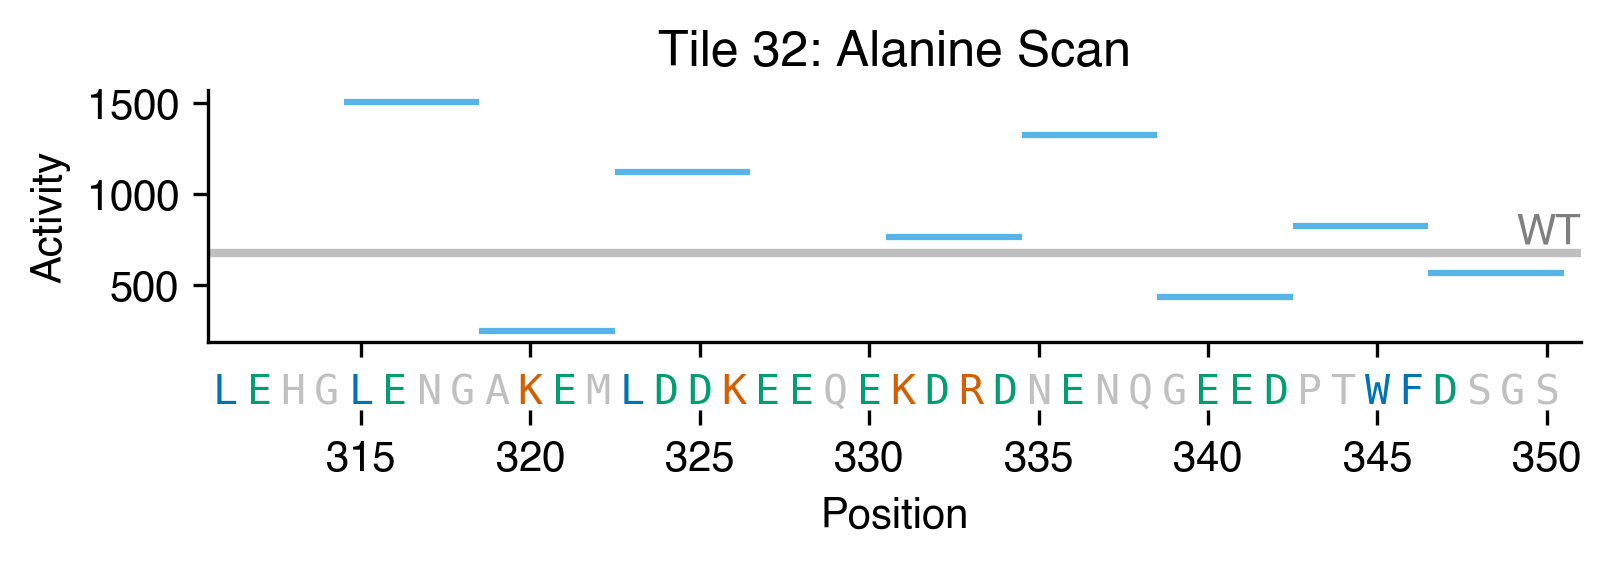

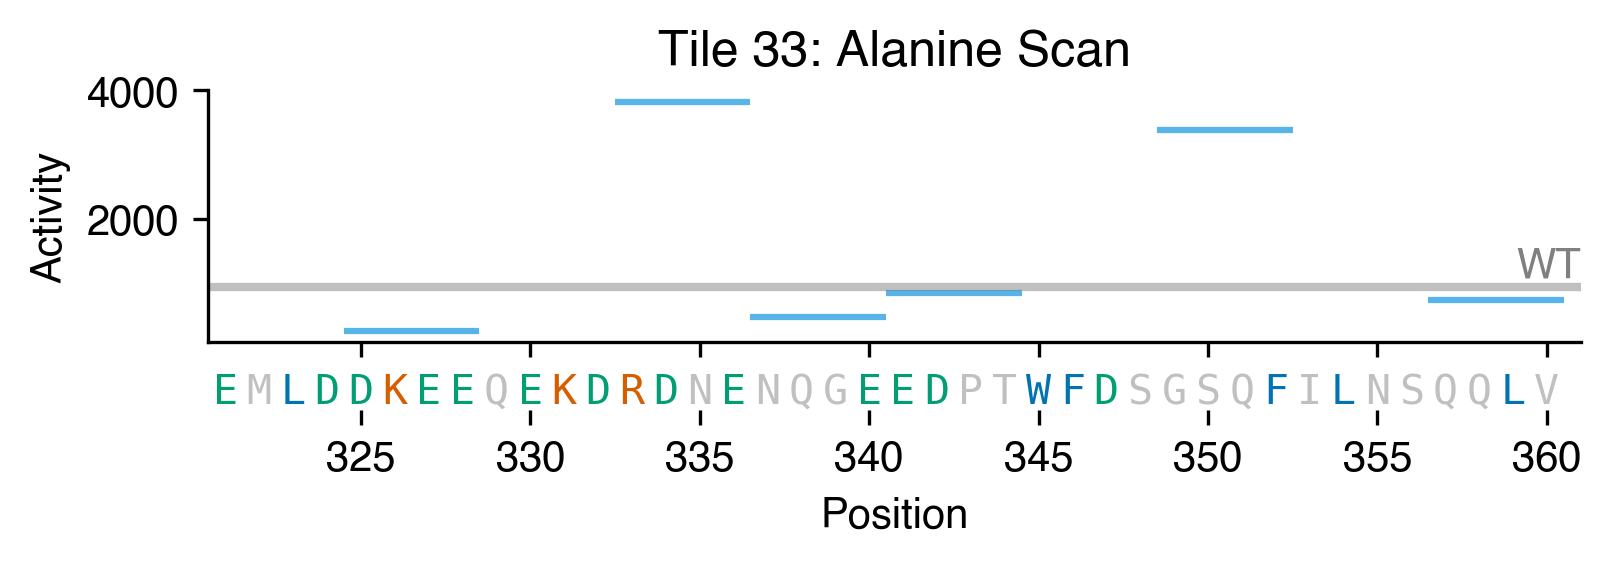

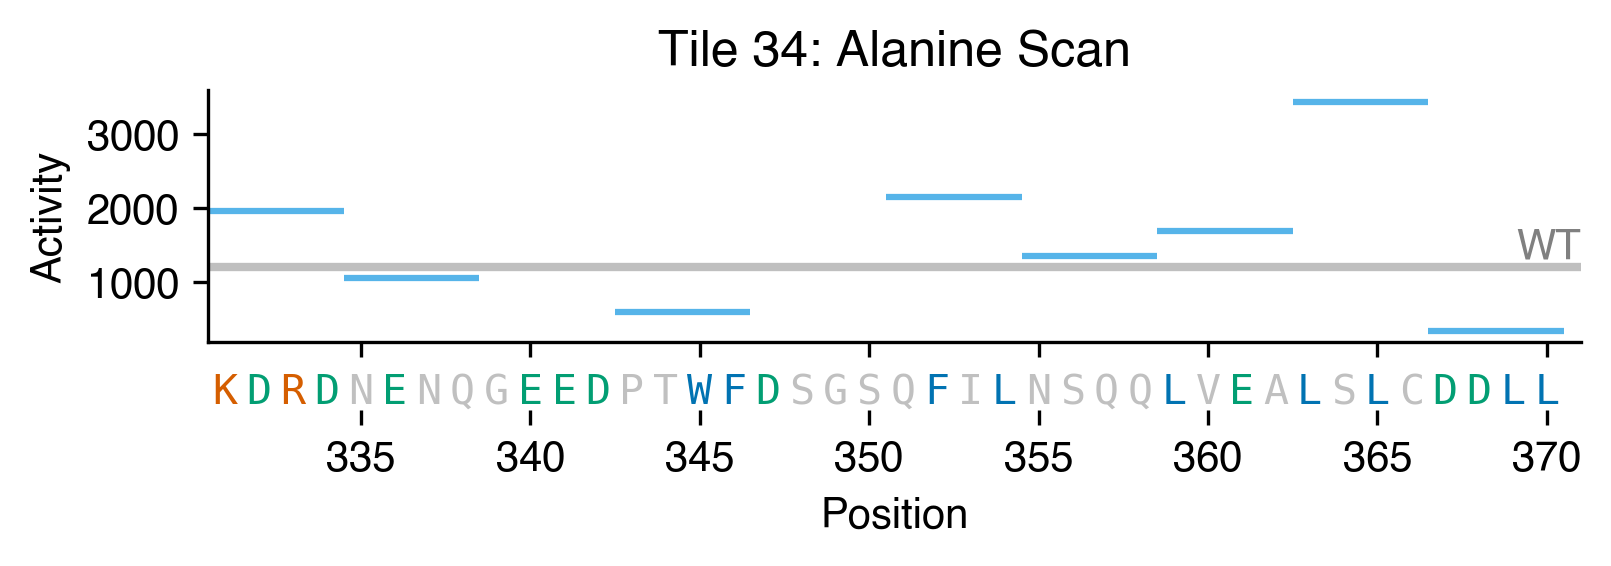

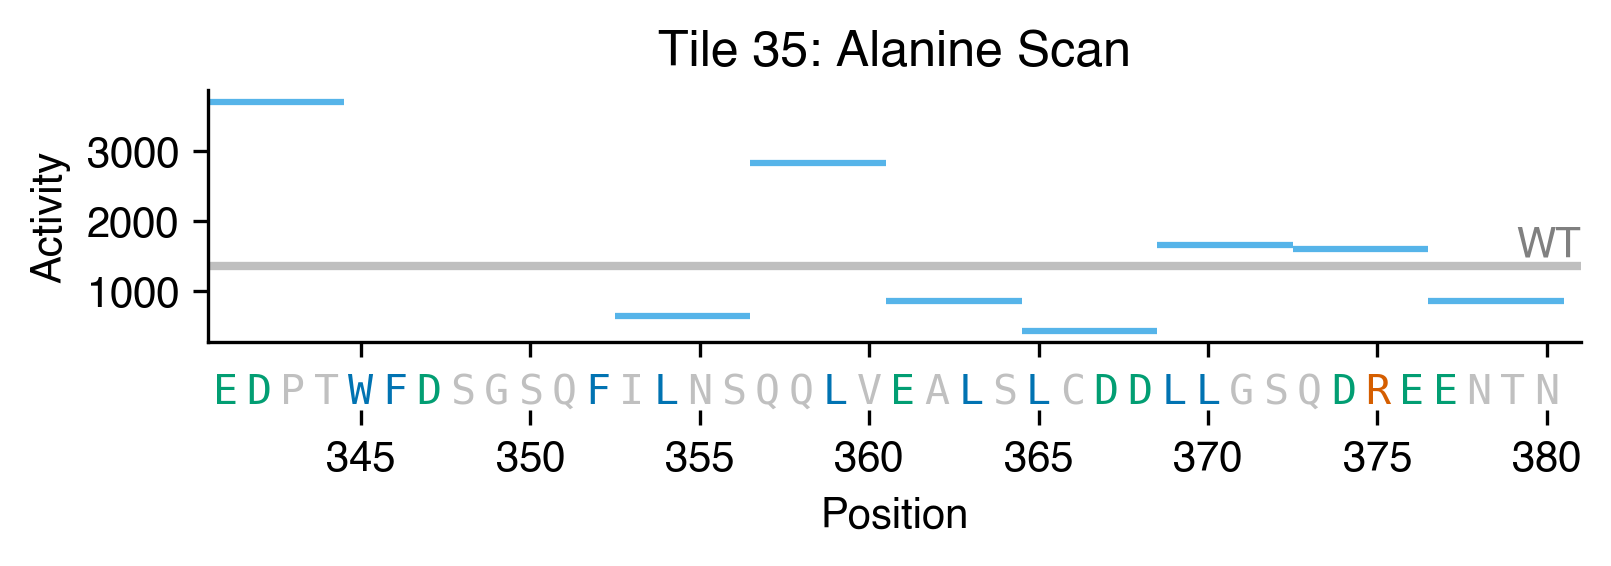

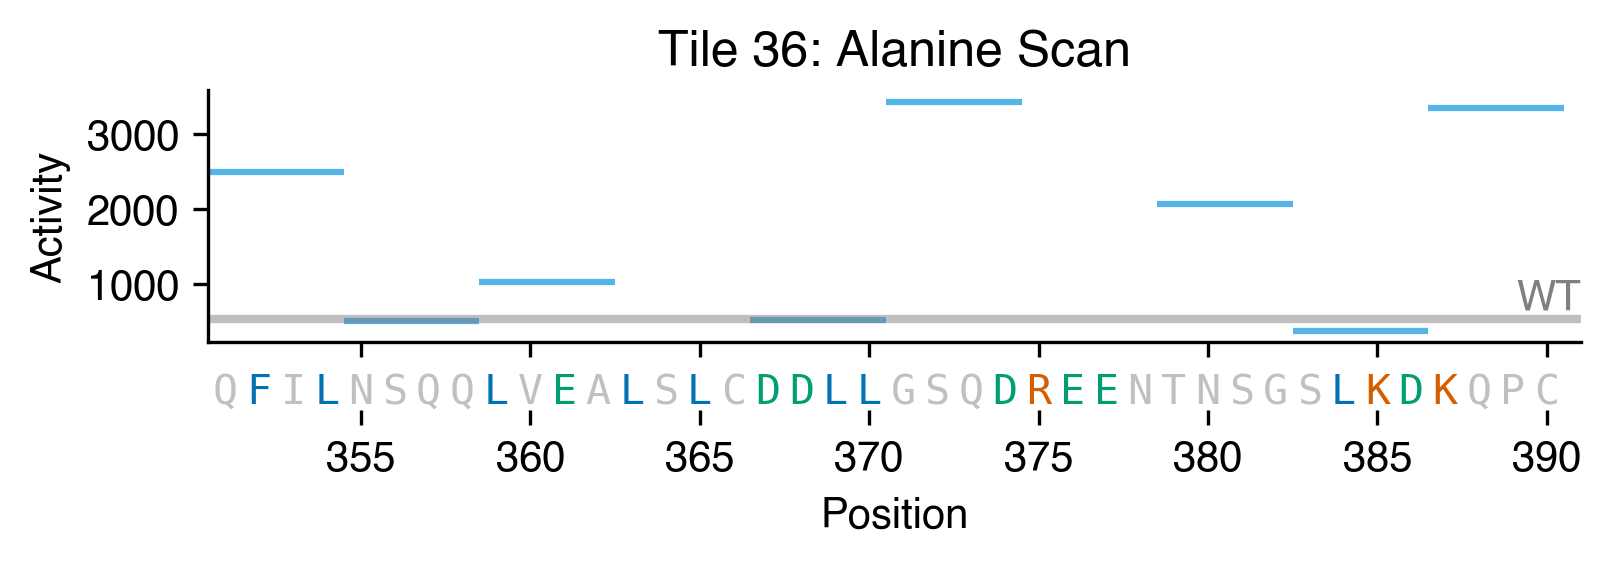

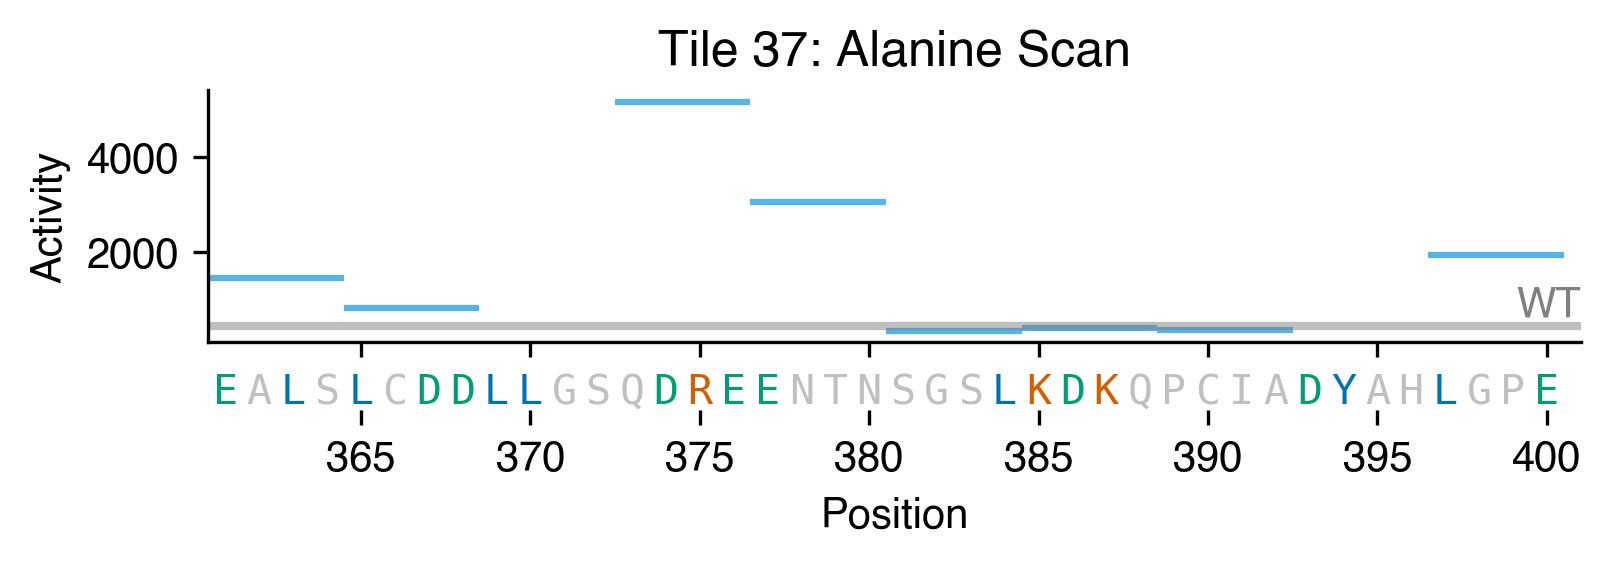

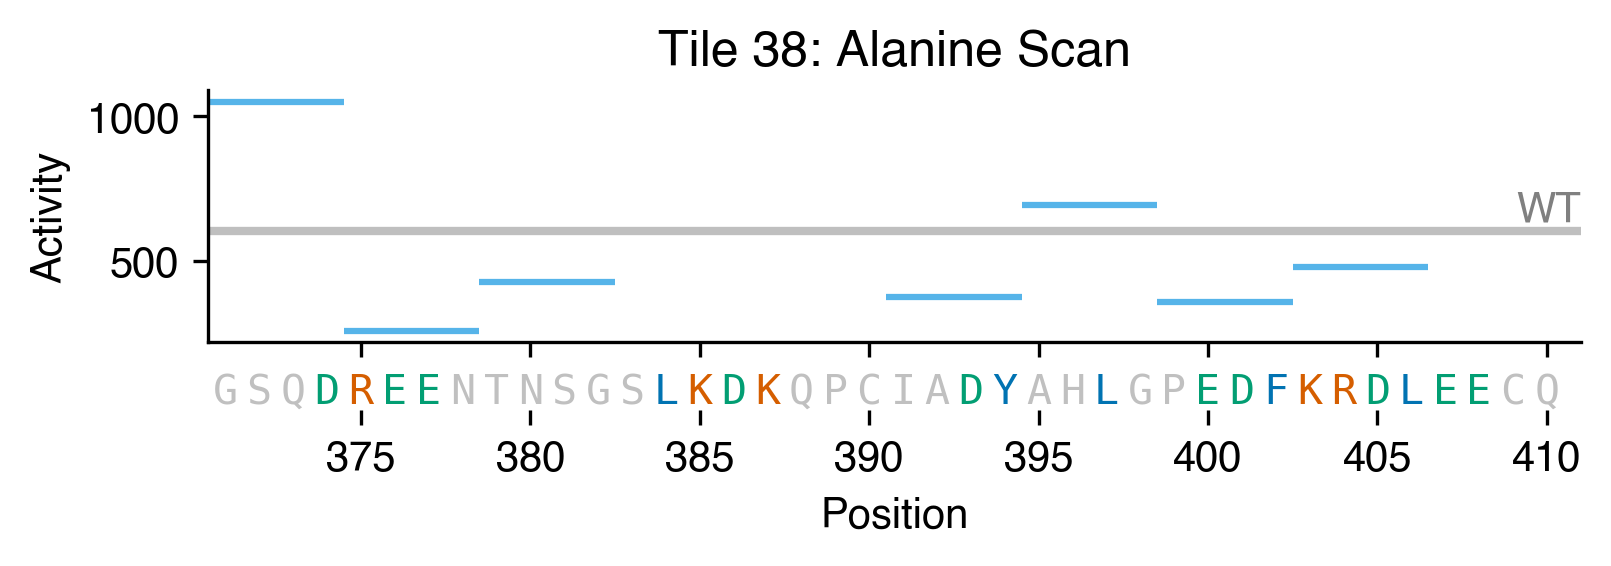

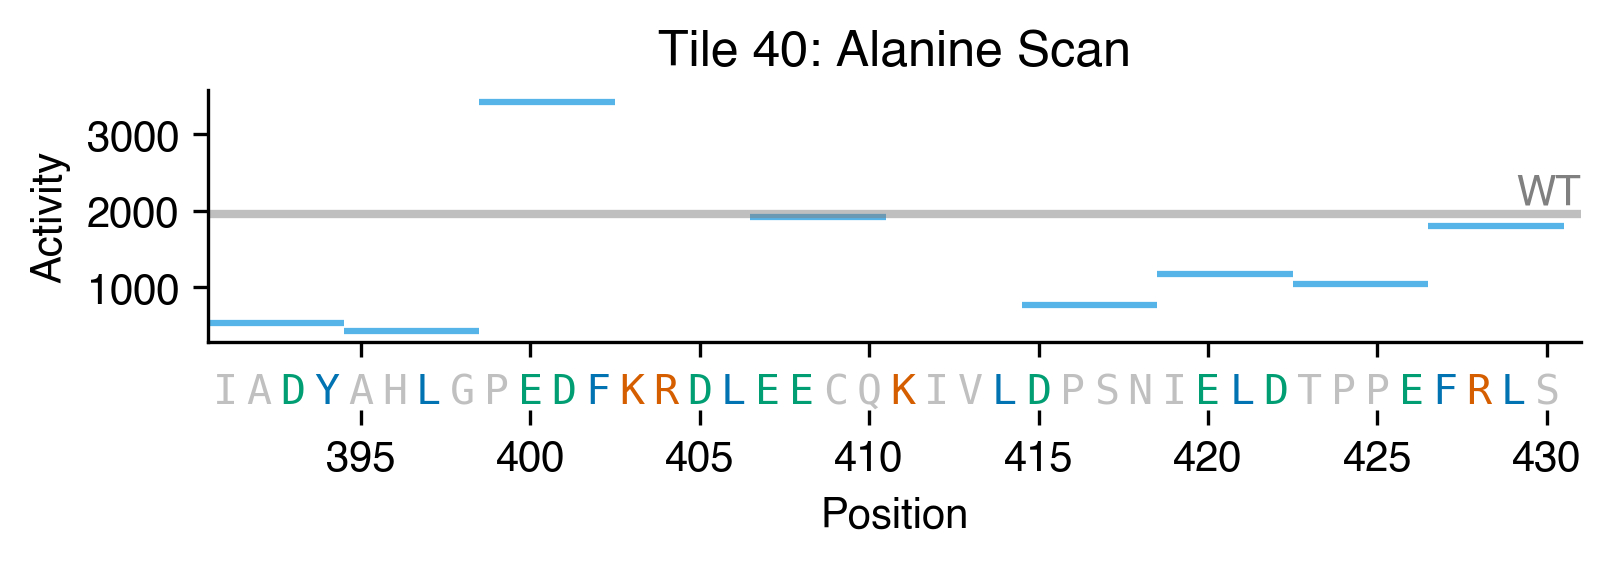

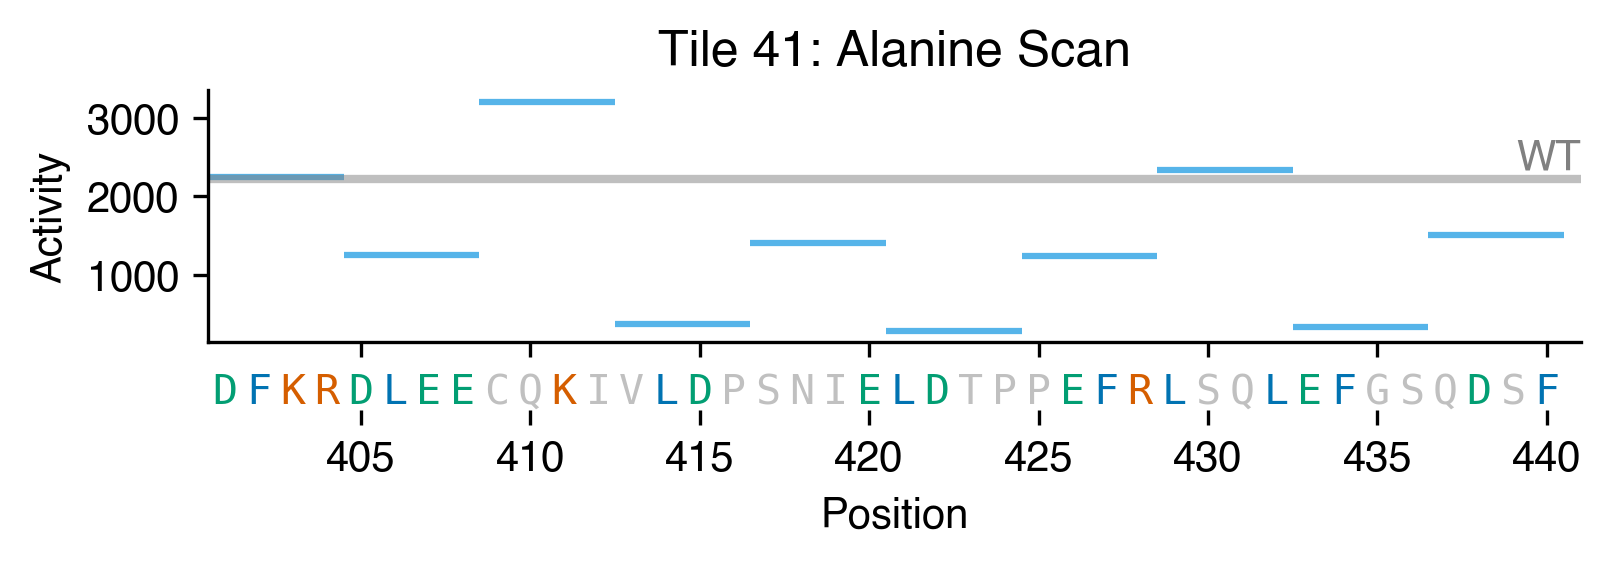

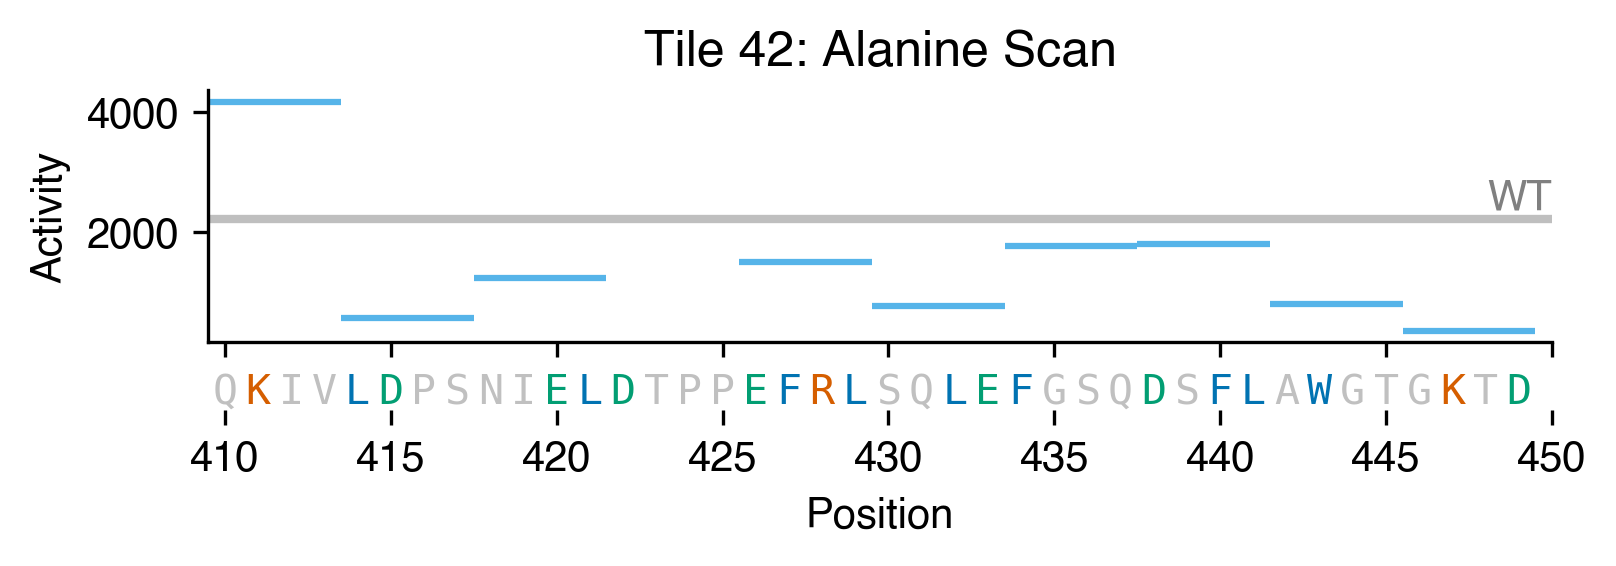

In [81]:
for i in Ascan_s["tile_num"].unique():
    plot_tile_Ascan(i)

In [ ]:
Ascan_s["tile_num"].unique()

array([32, 33, 34, 35, 36, 37, 38, 40, 41, 42])

In [425]:
Ascan_s["tile_num"].value_counts()

tile_num
41    10
42     9
32     8
34     8
35     8
36     8
37     8
40     8
38     7
33     6
Name: count, dtype: int64